In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [9]:
#!pip install --upgrade torchvision torch
#!pip show torch
#!conda install pytorch -y

In [2]:
#print the attributes of a tensor
a = torch.rand(3,4)
print(a)
print("a.shape = ", a.shape)
print("a.device = ", a.device)
print("a.requires_grad = ", a.requires_grad)
print("a.grad = ", a.grad)
print("a.grad_fn = ", a.grad_fn)
print("a.is_leaf = ", a.is_leaf)

tensor([[0.9841, 0.6597, 0.5854, 0.6993],
        [0.4593, 0.9126, 0.5498, 0.7071],
        [0.8958, 0.0374, 0.2436, 0.2475]])
a.shape =  torch.Size([3, 4])
a.device =  cpu
a.requires_grad =  False
a.grad =  None
a.grad_fn =  None
a.is_leaf =  True


In [11]:
b = a.mm(torch.tensor([[1.0],[1.0],[1.0],[1.0]], requires_grad=True))
print(b)
print("b.shape = ", b.shape)
print("b.device = ", b.device)
print("b.requires_grad = ", b.requires_grad)
#print("b.grad = ", b.grad)
print("b.grad_fn = ", b.grad_fn)
print("b.is_leaf = ", b.is_leaf)

tensor([[1.3488],
        [1.9384],
        [1.0908]], grad_fn=<MmBackward0>)
b.shape =  torch.Size([3, 1])
b.device =  cpu
b.requires_grad =  True
b.grad_fn =  <MmBackward0 object at 0x00000159E517BB20>
b.is_leaf =  False


In [12]:
#Parameter
class TestParameter(nn.Module):#继承nn.Module
    def __init__(self, in_dim): #构造函数，需要调用nn.Mudule的构造函数
        super().__init__()       #等价于nn.Module.__init__()
        self.w = nn.Parameter(torch.randn(in_dim+1, 1))
        self.w1 = nn.Parameter(torch.randn(in_dim + 1, 1))
        self.w2 = nn.Parameter(torch.randn(in_dim + 1, 1))
        
        print("w.size()=", self.w.size())

    def show_info(self, flag = True): 
        if flag:
            for name, parameter in self.named_parameters():
                print(name, '\n', parameter, '\n', parameter.data)
        else:
            for parameter in self.parameters():
                print(parameter, '\n', parameter.data)

In [13]:
tp = TestParameter(3)
tp.show_info()
print("----------------------")
tp.show_info(False)

w.size()= torch.Size([4, 1])
w 
 Parameter containing:
tensor([[0.9187],
        [0.9665],
        [0.6615],
        [0.3141]], requires_grad=True) 
 tensor([[0.9187],
        [0.9665],
        [0.6615],
        [0.3141]])
w1 
 Parameter containing:
tensor([[ 1.4664],
        [-0.5899],
        [ 0.9677],
        [-0.5392]], requires_grad=True) 
 tensor([[ 1.4664],
        [-0.5899],
        [ 0.9677],
        [-0.5392]])
w2 
 Parameter containing:
tensor([[ 0.1586],
        [-0.7830],
        [-0.4222],
        [ 0.7269]], requires_grad=True) 
 tensor([[ 0.1586],
        [-0.7830],
        [-0.4222],
        [ 0.7269]])
----------------------
Parameter containing:
tensor([[0.9187],
        [0.9665],
        [0.6615],
        [0.3141]], requires_grad=True) 
 tensor([[0.9187],
        [0.9665],
        [0.6615],
        [0.3141]])
Parameter containing:
tensor([[ 1.4664],
        [-0.5899],
        [ 0.9677],
        [-0.5392]], requires_grad=True) 
 tensor([[ 1.4664],
        [-0.5899],

In [14]:
class LinearRegression(nn.Module):#继承nn.Module
    def __init__(self, in_dim): #构造函数，需要调用nn.Mudule的构造函数
        super().__init__()       #等价于nn.Module.__init__()
        self.w = nn.Parameter(torch.randn(in_dim+1, 1))
        print("w.size()=", self.w.size())

    def forward(self, x): # x -> y
        x = torch.cat([x, torch.ones((x.shape[0],1))], dim = 1)
        y = x.matmul(self.w)
        return y

In [15]:
# Recall the use of torch.cat
a = torch.zeros(3,4)
print(a)
b = torch.cat([a, torch.ones((a.shape[0], 1))], dim = 1)
print(b)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]])


In [16]:
def testForwardLR(in_dim, data_size = 2):
    layer = LinearRegression(in_dim)
    input=torch.randn(data_size,in_dim)
    print("calling layer(input)")
    output=layer(input)  #前向传播 执行forward() ,  __call__
    print("output\n", output)
    print("calling layer.forward(input)")
    output=layer.forward(input)
    print("output\n", output)
    print("calling layer.__call__(input)")
    output=layer.__call__(input)
    print("output\n", output)

    #print("output\n", output)
    for name, parameter in layer.named_parameters():
        print(name, parameter)

testForwardLR(2,2)

w.size()= torch.Size([3, 1])
calling layer(input)
output
 tensor([[0.2116],
        [1.6785]], grad_fn=<MmBackward0>)
calling layer.forward(input)
output
 tensor([[0.2116],
        [1.6785]], grad_fn=<MmBackward0>)
calling layer.__call__(input)
output
 tensor([[0.2116],
        [1.6785]], grad_fn=<MmBackward0>)
w Parameter containing:
tensor([[1.3568],
        [1.8005],
        [0.3485]], requires_grad=True)


In [17]:
#Test the use of __call__()
class CALL_TEST(object):
    def __call__(self, x):
        print("[", x, "]")
ct = CALL_TEST()
ct(3)

#nn.Module
#def __call__(self, ...):
    #forward()

[ 3 ]


In [18]:
# The class to train and test the LinearRegression class
class Linear_Model():
    def __init__(self, in_dim):
        """
        创建模型和优化器，初始化线性模型和优化器超参数
        """
        self.learning_rate = 0.01
        self.epoches = 1000
        self.model = LinearRegression(in_dim) #torch.nn.Linear(in_dim,1)
        self.optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate)
        self.loss_function = torch.nn.MSELoss()

    def train(self, x, y, if_plot = False):
        """
        训练模型并保存参数
        输入:
            model_save_path: saved name of model
            x: 训练数据
            y: 回归真值
        返回:
            losses: 所有迭代中损失函数值
        """
        losses = []
        for epoch in range(self.epoches):
            prediction = self.model(x) # forward, __call__  input->output

            loss = self.loss_function(prediction, y)

            self.optimizer.zero_grad()
            loss.backward() #gradient
            self.optimizer.step() #update

            losses.append(loss.item())

            if epoch % 50 == 0:
                print("epoch: {}, loss is: {}".format(epoch, loss.item()))

        if x.shape[1]==1 and if_plot:
            plt.figure()
            plt.scatter(x.numpy(), y.numpy())
            plt.plot(x.numpy(), prediction.numpy(), color="r")
            plt.show()

        return losses
        
    def test(self, x, y, if_plot = False):
        """
        用保存或训练好的模型做测试
        输入:
            model_path: 训练好的模型的保存路径, e.g., "linear.pth"
            x: 测试数据
            y: 测试数据的回归真值
        返回:
            prediction: 测试数据的预测值
        """
        prediction = self.model(x)
        testMSE = self.loss_function(prediction, y)

        if if_plot and x.shape[1]==1 and if_plot:
            plt.figure()
            plt.scatter(x.numpy(), y.numpy())
            plt.plot(x.numpy(), prediction.numpy(), color="r")
            plt.show()

        return prediction, testMSE


In [19]:
# Creat the training and test datasets
def create_linear_data(data_size, in_dim, if_plot = False):
    """
    为线性模型生成数据
    输入:
        data_size: 样本数量
    返回:
        x_train: 训练数据
        y_train: 训练数据回归真值
        x_test: 测试数据
        y_test: 测试数据回归真值
    """
    np.random.seed(426)
    torch.manual_seed(426)
    #torch.cuda.manual_seed(426)

    x = torch.Tensor(data_size, in_dim).uniform_(1,10)

    w_true = torch.Tensor(in_dim, 1).uniform_(-5,5)
    #map_true = torch.tensor([[1.5],[-5.],[3.]], dtype=torch.float32)
    print('w真值:{}'.format(w_true))
    
    y = x.mm(w_true) + 10. + torch.FloatTensor(data_size, 1).normal_(0,10) #torch.randn(x.size())

    shuffled_index = np.random.permutation(data_size)
    #shuffled_index = torch.from_numpy(shuffled_index).long()
    x = x[shuffled_index]
    y = y[shuffled_index]
    split_index = int(data_size * 0.7)
    x_train = x[:split_index]
    y_train = y[:split_index]
    x_test = x[split_index:]
    y_test = y[split_index:]

    if if_plot and in_dim == 1:
        plt.figure()
        plt.scatter(x_train.numpy(),y_train.numpy())
        plt.show()
    return x_train, y_train, x_test, y_test
    

w真值:tensor([[-4.4202],
        [-3.3697]])
hello
torch.Size([70, 2]) torch.Size([30, 2])
w.size()= torch.Size([3, 1])
Start training
epoch: 0, loss is: 1463.7684326171875
epoch: 50, loss is: 92.34663391113281
epoch: 100, loss is: 89.63218688964844
epoch: 150, loss is: 87.42671203613281
epoch: 200, loss is: 85.6347885131836
epoch: 250, loss is: 84.17884063720703
epoch: 300, loss is: 82.99589538574219
epoch: 350, loss is: 82.0347671508789
epoch: 400, loss is: 81.25385284423828
epoch: 450, loss is: 80.61934661865234
epoch: 500, loss is: 80.10382843017578
epoch: 550, loss is: 79.68498229980469
epoch: 600, loss is: 79.34465026855469
epoch: 650, loss is: 79.0681381225586
epoch: 700, loss is: 78.8434829711914
epoch: 750, loss is: 78.66093444824219
epoch: 800, loss is: 78.51263427734375
epoch: 850, loss is: 78.39212799072266
epoch: 900, loss is: 78.29422760009766
epoch: 950, loss is: 78.21467590332031
Finish training


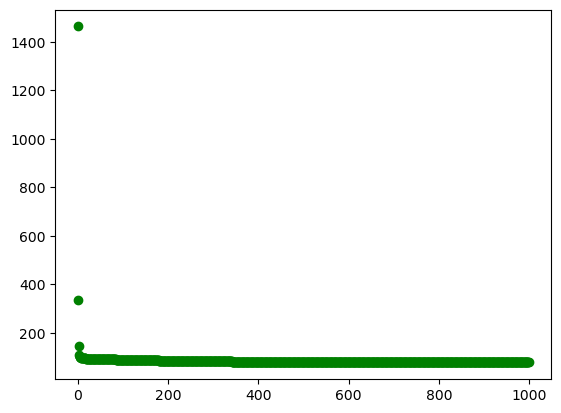

测试集上MSE损失值:63.47187805175781
w Parameter containing:
tensor([[-4.7358],
        [-3.2948],
        [11.4932]], requires_grad=True)


In [20]:
# 生成数据
data_size = 100
in_dim = 2
x_train, y_train, x_test, y_test = create_linear_data(data_size, in_dim, if_plot=False)

print("hello")
print(x_train.shape, x_test.shape)

# 线性回归模型实例化
linear = Linear_Model(in_dim)

# 模型训练
print("Start training")
losses = linear.train(x_train, y_train)
print("Finish training")


if_plot = True # set to True if you want to plot
if if_plot:
    plt.figure()
    plt.scatter(np.arange(len(losses)), losses, marker='o', c='green')
    plt.savefig('loss.jpg')
    plt.show()
# 模型测试
prediction, testMSE = linear.test(x_test, y_test)
print('测试集上MSE损失值:{}'.format(testMSE))


print('===============================')
for name, parameter in linear.model.named_parameters(): #named_parameters()  parameters()
    print(name, parameter)